# Introduction

Thank you for taking our test! We look forward to reading your results.

- The test contains 2 sections. 
- You have 1 week to complete the test.
- We prefer if you use jupyter notebook to present your code and results. It is fine if you want to include additional libraries as separate python files. 
- If you don't have any python experience, you can use another language.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
# pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.7/202.7 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 kB 41.4 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42034 sha256=cdee28a0ee38ab24c8725f8dc1cadb614b74a39e9aa98f0432aa73dd11627eeb
  Stored in directory: /root/.cache/pip/wheels/6d/32/bd/460a71becd83f7d77152f437c2fd451f5c87bc19cfcdbfcd24
Successfully built factor_analyzer


In [3]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

# Task 1

Given the below information
- X1, X2 and X3 are the predictors
- Y is the target variable

Identify how is Y related to X1, X2 and X3 and fill the Y cells from row 15,000 onwards

Please note that the relationship is **fully deterministic** but there is more than 1 relationship.

Output: 

Please provide the file ML_test1.csv with rows 1 to 19,998 and do not remove in-sample rows (which are from 1 to 14,999).
Also, explain the relationships between Y and X1, X2 and X3 in the notebook.

In [4]:
!git clone https://github.com/laughingbud/conquer.git # clone github repo 
# from google.colab import drive
# drive.mount('/content/drive/')

Cloning into 'conquer'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 47 (delta 14), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (47/47), 32.86 MiB | 2.26 MiB/s, done.
Updating files: 100% (16/16), done.


In [5]:
task1_data = pd.read_csv('conquer/ML_test1.csv',index_col=None)
task1_data.head()

,X1,X2,X3,Y
0,0.433278,-0.180904,-0.426411,0.614182
1,-0.461811,-0.204108,0.036119,-0.036119
2,-0.011897,-0.182808,0.256612,0.100000
3,-0.451108,-0.151159,-0.007978,0.007978
4,0.192973,-0.412564,0.107185,-0.112406


In [6]:
task1_data.describe()

,X1,X2,X3,Y
count,19995.000000,19995.000000,19995.000000,14998.000000
mean,-0.000960,0.002051,-0.000191,0.017811
std,0.287825,0.288636,0.289385,0.288890
min,-0.499993,-0.499913,-0.499972,-0.927212
25%,-0.247543,-0.245841,-0.250855,-0.202540
50%,-0.004666,0.001510,-0.002747,0.100000
75%,0.248101,0.253533,0.252823,0.193096
max,0.499999,0.499958,0.499930,0.969272


- We observe that variable Y data is continuous from row 0 until 14997 and has Nan starting row no. 14998. 
- Also the features have mean close to zero and even standard deviation and range are similar. This makes us conclude these features are already standardized.
- However predicted variable Y has a different range of values than features hence we will need to normalize all of the variables later.

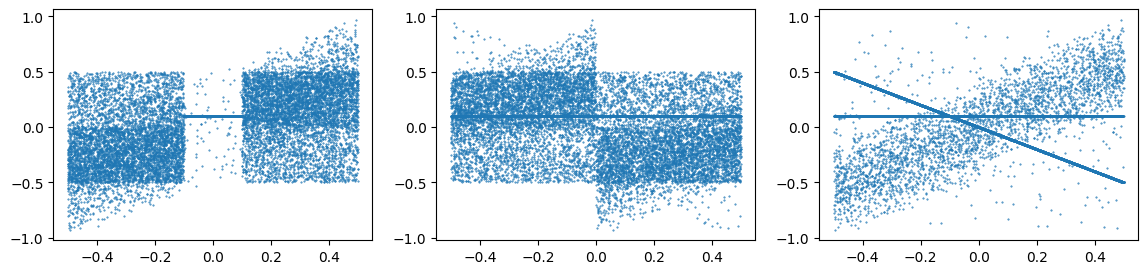

In [17]:
fig,ax = plt.subplots(1,3,figsize=(14,3))
ax[0].scatter(task1_data.X1,task1_data.Y,s=0.2)
ax[1].scatter(task1_data.X2,task1_data.Y,s=0.2)
ax[2].scatter(task1_data.X3,task1_data.Y,s=0.2)

From the scatter plot, we can see there are multiple relationships likely. There are visible lines, boxes and other triangular like shapes.

In [7]:
task1_data.corr()

,X1,X2,X3,Y
X1,1.000000,-0.008958,-0.002757,0.459272
X2,-0.008958,1.000000,-0.008567,-0.289836
X3,-0.002757,-0.008567,1.000000,-0.344865
Y,0.459272,-0.289836,-0.344865,1.000000


- Correlation is very low amongst X1, X2 and X3, making them good candidates as independent variables to predict Y. So it makes us believe that there won't be a problem of multicollinearity. 
- Also we got a sense of how each of the predictors might likely be related to the predicted variable, atleast in terms of the direction if not the magnitude.

In [64]:
# task1_data.iloc[:14999,:]
# df.iloc[:,:3]

Since the predicted variable is on a different scale than the features, hence we transform the variables below for further analysis.

In [25]:
data_normal = preprocessing.StandardScaler().fit_transform(task1_data.iloc[:14998,:])
df = pd.DataFrame(data_normal, columns=[task1_data.columns])

In [65]:
# Bartlett's Test
chi_square_value, p_value = calculate_bartlett_sphericity(df.iloc[:,:3])
print("chi_square_value =", chi_square_value, "\np_value =", p_value)

chi_square_value = 3.3864438828429284 
p_value = 0.33579134254248066


Bartlett's test of sphericity checks whether the variables intercorrelate using the observed correlation matrix vs identity matrix. Since the p-value > 0.05, the test is not significant and conclude we should not conduct a factor analysis.

In [37]:
# Kaiser-Meyer-Olkin (KMO) Test
kmo_all, kmo_model = calculate_kmo(df.iloc[:,:3])
print("kmo_model =", kmo_model)

kmo_model = 0.4998840496946466


KMO tests indicates that around 50% of variance in our features is caused by underlying factors. This is neither high or low level and since Bartlett's test also indicated, there is no point in conducting factor analysis.

In [56]:
df

,X1,X2,X3,Y
0,1.517395,-0.635247,-1.477861,2.064418
1,-1.590886,-0.715696,0.123117,-0.186687
2,-0.028515,-0.641850,0.886319,0.284509
3,-1.553718,-0.532119,-0.029520,-0.034037
4,0.682915,-1.438426,0.369099,-0.450765
...,...,...,...,...
14993,-0.013777,-0.619012,0.221218,0.284509
14994,-0.258847,-0.986408,-0.167691,0.284509
14995,0.965510,1.711527,-0.966287,0.902808
14996,-1.612882,-0.511795,1.544453,-1.608142


In [57]:
# Create 3-factor object and fit data
fa3 = FactorAnalyzer(3, rotation=None)
fact_res3 = fa3.fit(df.iloc[:,:3])

# Get uniquenesses
pd.DataFrame(
    fact_res3.get_uniquenesses(), index=[task1_data.columns[:3]], columns=["uniquenesses"]
)

,uniquenesses
X1,0.989080
X2,0.980638
X3,0.987520


In [44]:
# task1_data[['X1', 'X2', 'X3']].plot()

In [7]:
task1_data.iloc[:14998,:][['X1', 'X2', 'X3']].values.toframe()

AttributeError: ignored

In [8]:
y = task1_data.iloc[:14998,:].Y.values

X = task1_data.iloc[:14998,:][['X1', 'X2', 'X3']].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

reg_coeff = pd.DataFrame(regressor.coef_, index=['X1', 'X2', 'X3'], columns=['Reg_coeff'])
reg_coeff

,Reg_coeff
X1,0.453984
X2,-0.290741
X3,-0.346153


In [51]:
regressor.coef_

array([ 0.45398444, -0.29074118, -0.34615261])

# Task 2

We give you the following data: 

- Market data: the market data will be available after today market close. 
    - openadj/closeadj are open/close price adjusted for corporate actions
    - adv: average daily volume in dollars 
    - market cap: total market value in million dollars
    - sector info: the sector classification of the instruments in this universe
    - if the market cap is null for a stock for one day, the stock is out of the universe
- Other predictors: they might have different update frequency. The predictors are available before today market open. 
    - technical indicator: it is derived from market data
    - holding indicator: this is the total value in dollars held by a group of institutional investors
    - 2 accounting statement items: net income and sales in million dollars 
         - the net income is cumulative over the course of the fiscal year, i.e., Q2 amount is given as Q1 + Q2; Q4 amount is given as Q1 + Q2 + Q3 + Q4.
         - the sales figure is non-cumulative.

## Instructions
We expect you to 
1. **Process the data:** identify potential data issues and clean the data accordingly 
2. **Describe the data:** you should try to understand the data (e.g. overall distribution, time-series dynamics etc.)
3. **Design a prediction model:** you should try to predict future stock returns based on all information given. 
   - We prefer not to bet on market direction. Your model should avoid MARKET exposure.
   - We prefer not to bet on large vs small stocks. Your model should avoid SIZE exposure.
   - Be careful about look-ahead bias.
   - Be careful about the fact that small stocks are much more expensive to trade. You don't want your model to be good at predicting small stocks and very bad at predicting large ones
4. **Provide us with a final conclusion:** you should include statistics, a summary of your attempts and potential future ideas.

## Evaluation

You will be evaluated based on the following criteria:

- 20% - **Code quality**
- 20% - **Presentation of results and explanations.** We should be able to understand what you did without reading the code.
- 20% - **Data analysis skills**
- 10% - **Creativity**
- 10% - **Prediction accuracy**

Good luck!

In [ ]:
'''
Raw predictors
'''
financial_indicator = pd.read_csv('./financial_indicator.csv', index_col=None)
technical_indicator = pd.read_csv('./technical_indicator.csv', index_col=0)
holding_indicator = pd.read_csv('./holding_indicator.csv', index_col=0)

In [ ]:
financial_indicator.head()

In [ ]:
technical_indicator.head()

In [ ]:
holding_indicator.head()

In [ ]:
'''
Market data
'''
op = pd.read_csv('./openadj.csv',index_col=0)
cp = pd.read_csv('./closeadj.csv',index_col=0) 
adv = pd.read_csv('./adv.csv',index_col=0)
cap = pd.read_csv('./market_cap.csv',index_col=0)
sector = pd.read_csv('./sectors.csv', index_col=0)

In [ ]:
op.head()

In [ ]:
cp.head()

In [ ]:
adv.head()

In [ ]:
cap.head()

In [ ]:
sector.head()